<a href="https://colab.research.google.com/github/Venu2791/Deep-Vision/blob/master/Assignment4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [3]:
# https://keras.io/
!pip install -q keras
import keras
!pip install -q keras-vis
import vis
!pip install -q clr 

Using TensorFlow backend.


Importing Different different classes in keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,GlobalAveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step



Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


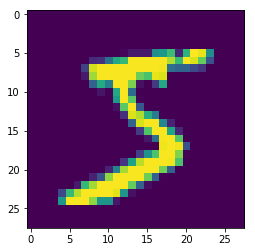

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


Changing shape of the image to keep it in gray scale.


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Convert the data to float type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One - hot encoding of the output class.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

***Problem Statement:***

The task is to get 99.4% validation accuracy in the model.


**Constraints:**

*   Number of parameters should be less than 15000.
*   Start from a Vanilla DNN. 





## **Step 1**

First, we start with a vanilla DNN, the objective here is ro fix the archietecture for the problem statement.

**Architecture:**

Network has 8 Convolution layers, which inturn placed in 2 blocks and one max pooling layer (Transition layer). The network has 13,664 parameters. For each layer, the convoultion and receptive field is shown below.




In [40]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 28X28X1 | 3X3X1X8 -> 26X26X8 | GRF - 3

#CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3,3, activation='relu')) #26X26X8 | 3X3X8X16 -> 24X24X16 | GRF - 5
model.add(Convolution2D(32, 3,3, activation='relu')) #24X24X16 | 3X3X16X32 -> 22X22X32 | GRF - 7
#CONVOLUTION BLOCK 1 ENDS

#TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))            #22X22X32 ->Max Pooling -> 11X11X32 | GRF - 14
model.add(Convolution2D(10, 1, activation='relu'))   #11X11X32 | 1X1X10 -> 11X11X10 | GRF - 14
#TRANSITION BLOCK 1 ENDS

#CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(10, 3,3, activation='relu'))#11X11X10 | 3X3X10X10 -> 9X9X10 GRF -16
model.add(Convolution2D(16, 3,3, activation='relu')) #9X9X10   | 3X3X10X16 -> 7X7X16 GRF -18
model.add(Convolution2D(10, 1, activation='relu'))   #7X7X16   | 1X1X10X10 -> 7X7X10 GRF-18
model.add(Convolution2D(10, 7,7))                    #7X7X10   | 3X3X10X10 -> 1X1X10 GRF-24
#CONVOLUTION BLOCK 2 ENDS

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-p

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 16)          1456      
__________

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Model.compile()**

**Loss Function:** A loss function is a mathematical function that calculates some sort of differentiable distance measure between the network's output and the actual output for each class. During training, we average out these losses and backpropagate them through the network.

**Optimizer:** This step selects an optimizer algorithm that manipulates the learning rate per time-step so as to update the weights in a manner that does not lead to a swinging behaviour around the minimum.



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

**Training the model:**

Train data are generally sent in batches for the network ,this is called minibatch Gradient Descent instead of fullbatch Gradient Descent. Though it is ideal to to do the fullbatch gradient Descent, the memory required is humongous and not possible after certain limit. Hence, we go with a minibatch version -  it consumes less memory and does not give up too much accuracy.



In [44]:
model.fit(X_train, Y_train,  batch_size=64, validation_data=(X_test,Y_test),epochs=15, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.2548 - acc: 0.9199 - val_loss: 0.1061 - val_acc: 0.9674
Epoch 2/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.0833 - acc: 0.9753 - val_loss: 0.0708 - val_acc: 0.9773
Epoch 3/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.0627 - acc: 0.9807 - val_loss: 0.0568 - val_acc: 0.9820
Epoch 4/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0597 - val_acc: 0.9802
Epoch 5/15
60000/60000 [==============================] - 13s 218us/step - loss: 0.0457 - acc: 0.9863 - val_loss: 0.0448 - val_acc: 0.9852
Epoch 6/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0448 - val_acc: 0.9857
Epoch 7/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [46]:
print(score)

[0.04171938144539454, 0.9875]


In [0]:
y_pred = model.predict(X_test)

In [48]:
print(y_pred[:9])
print(y_test[:9])

[[1.03412328e-08 1.03885155e-13 2.79623146e-06 2.99944495e-05
  4.46636767e-17 5.17852650e-10 2.74432807e-20 9.99963999e-01
  3.15202753e-09 3.17980630e-06]
 [1.34132560e-13 4.32162579e-13 1.00000000e+00 3.52651046e-12
  3.96506305e-22 1.33576540e-16 3.50479958e-11 1.26039737e-21
  8.02762568e-09 5.11992992e-22]
 [1.44289058e-09 9.99709666e-01 5.37754895e-05 2.74044766e-07
  8.82954225e-07 4.34622161e-05 4.01412944e-06 1.72126383e-04
  1.00245852e-05 5.69365011e-06]
 [9.99997139e-01 1.73618747e-12 1.93321736e-09 3.86289611e-10
  4.46034008e-11 1.63849393e-07 2.46043214e-06 2.40420287e-13
  2.31031422e-07 2.62230770e-08]
 [5.75287491e-11 1.60132663e-14 3.30513927e-09 1.02603332e-12
  9.99999046e-01 5.70847869e-10 8.17719403e-09 8.83019786e-12
  3.70227227e-09 9.03868340e-07]
 [3.36132129e-11 9.99708474e-01 6.58353065e-06 7.87934429e-09
  4.26433780e-06 3.63390791e-05 5.48118919e-07 1.93839922e-04
  1.05633499e-05 3.93404662e-05]
 [6.37528323e-18 1.71567919e-13 2.44501086e-09 1.49806001e

**Observations :**

*  We have achieved the basic archietecture with less than 15k parameters. 
*   The best error rate achieved was 1.16%. 
*   We have have achieved 99.38% in the training accuracy which leaves with .62% to improve the model while the validation accuracy has to go up by 1.16%. 
*   One more option is to find a possibility wherein reduce the gap between the train and test accuracy if possible as this will reduce overfitting giving us more chance to improvize the model. 






**Kernel Extract (Feature Maps):**

The below code is to visualize the extract of the kernel of each layer from the convolution layer. With this we could find when the edges are formed so that max pooling could be exactly applied at that point. 

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7fdeab902588>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7fdeab902780>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7fdeab9029e8>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7fdeab0a1a20>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7fdeab902b38>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7fdeab0c13c8>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7fdeab059e80>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7fdeab06f198>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7fdeab06fe48>, 'flatten_1': <keras.layers.core.Flatten object at 0x7fdeab033978>, 'activation_1': <keras.layers.core.Activation object at 0x7fdeab048f28>}


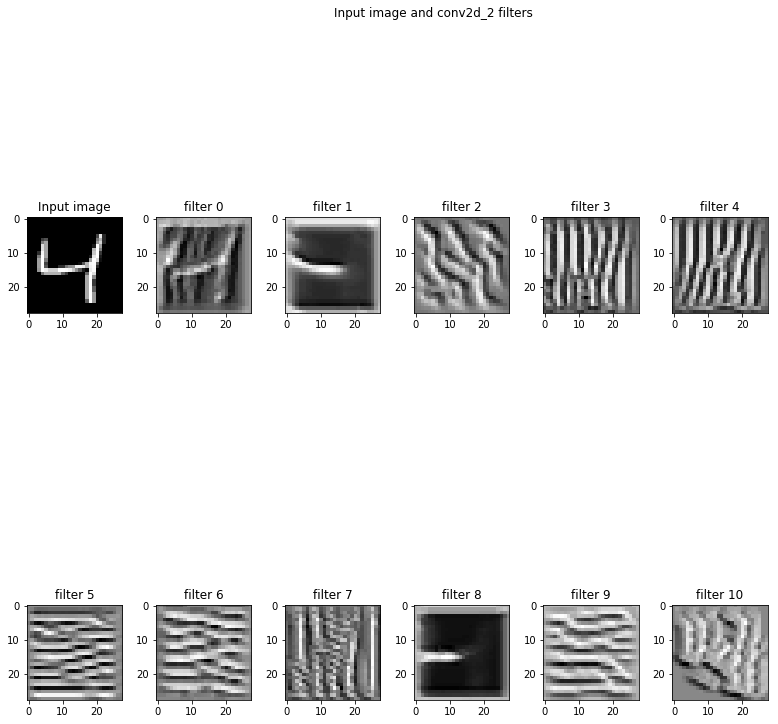

In [21]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K

layer_dict = dict([(layer.name, layer) for layer in model.layers])
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

**After Batch Normalization:**

{'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7fdea1a5a6a0>, 'batch_normalization_1': <keras.layers.normalization.BatchNormalization object at 0x7fdea1a5a588>, 'conv2d_10': <keras.layers.convolutional.Conv2D object at 0x7fdeae62ae48>, 'batch_normalization_2': <keras.layers.normalization.BatchNormalization object at 0x7fdea12777b8>, 'conv2d_11': <keras.layers.convolutional.Conv2D object at 0x7fdea1148a20>, 'batch_normalization_3': <keras.layers.normalization.BatchNormalization object at 0x7fdea10b9b70>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7fdea10f4cf8>, 'conv2d_12': <keras.layers.convolutional.Conv2D object at 0x7fdea10d3f98>, 'batch_normalization_4': <keras.layers.normalization.BatchNormalization object at 0x7fdea102f6a0>, 'conv2d_13': <keras.layers.convolutional.Conv2D object at 0x7fdea0f64da0>, 'batch_normalization_5': <keras.layers.normalization.BatchNormalization object at 0x7fdea0f64c18>, 'conv2d_14': <keras.layers.convolutional.Conv2D o

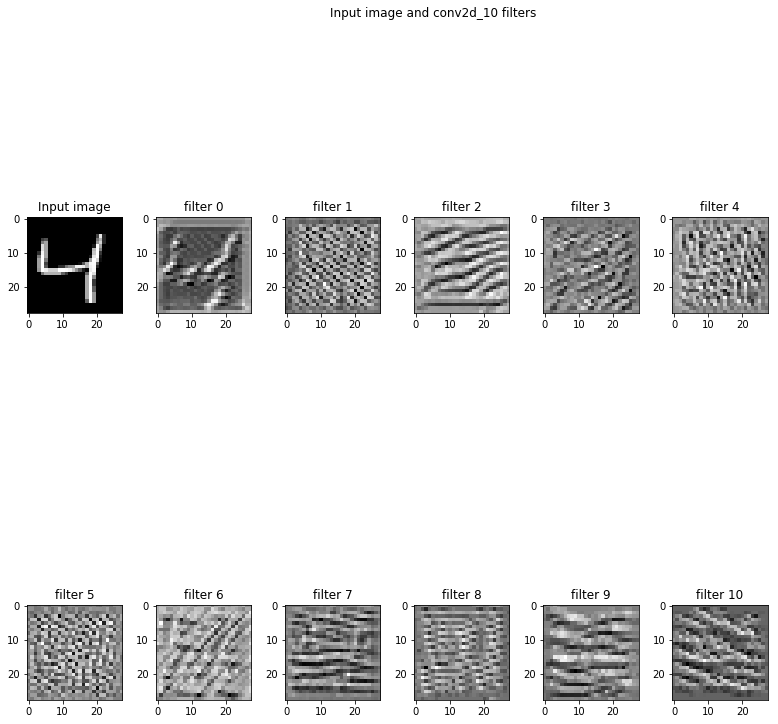

In [37]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K

layer_dict = dict([(layer.name, layer) for layer in model.layers])
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

##**Step2**


Here we introduce the concept of batch normalization and Drop-Out. 

*   BN improves the perfomance of the Backpropogation by preventing the backprogated gradient getting too small or big.
*   Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.



In [54]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))  # 28X28X1 | 3X3X1X8 -> 26X26X8 | GRF - 3
model.add(BatchNormalization())
#CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3,3, activation='relu')) #26X26X8 | 3X3X8X16 -> 24X24X16 | GRF - 5
model.add(BatchNormalization())
model.add(Convolution2D(32, 3,3, activation='relu')) #24X24X16 | 3X3X16X32 -> 22X22X32 | GRF - 7
model.add(BatchNormalization())
model.add(Dropout(0.2))
#CONVOLUTION BLOCK 1 ENDS
#TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))            #22X22X32 ->Max Pooling -> 11X11X32 | GRF - 14
model.add(Convolution2D(10, 1, activation='relu'))   #11X11X32 | 1X1X10 -> 11X11X10 | GRF - 14
model.add(BatchNormalization())
#TRANSITION BLOCK 1 ENDS

#CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(10, 3,3, activation='relu')) #11X11X10 | 3X3X10X10 -> 9X9X10 GRF -16
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) #9X9X10   | 3X3X10X16 -> 7X7X16 GRF -18
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu'))   #7X7X16   | 1X1X10X10 -> 7X7X10 GRF-18
model.add(Convolution2D(10, 7,7))                    #7X7X10   | 3X3X10X10 -> 1X1X10 GRF-24
#CONVOLUTION BLOCK 2 ENDS

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
W0820 09:04:39.233934 140595640870784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/p

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_15 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [58]:
model.fit(X_train, Y_train,  batch_size=64, validation_data=(X_test,Y_test),epochs=15, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 415us/step - loss: 0.2418 - acc: 0.9245 - val_loss: 0.0644 - val_acc: 0.9781
Epoch 2/15
60000/60000 [==============================] - 20s 340us/step - loss: 0.0671 - acc: 0.9786 - val_loss: 0.0627 - val_acc: 0.9792
Epoch 3/15
60000/60000 [==============================] - 20s 341us/step - loss: 0.0513 - acc: 0.9834 - val_loss: 0.0426 - val_acc: 0.9865
Epoch 4/15
60000/60000 [==============================] - 20s 339us/step - loss: 0.0439 - acc: 0.9860 - val_loss: 0.0396 - val_acc: 0.9863
Epoch 5/15
60000/60000 [==============================] - 20s 339us/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0360 - val_acc: 0.9891
Epoch 6/15
60000/60000 [==============================] - 20s 339us/step - loss: 0.0345 - acc: 0.9884 - val_loss: 0.0345 - val_acc: 0.9901
Epoch 7/15
60000/60000 [==============================] - 21s 343us/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.

In [59]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.029817303871913465, 0.9904]


In [60]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[6.82581075e-12 1.40471357e-09 2.64925184e-08 4.77444351e-09
  3.23642395e-15 8.98587980e-14 2.15745603e-20 1.00000000e+00
  3.75270121e-14 3.58213709e-10]
 [7.52650612e-06 1.14591512e-05 9.99279678e-01 3.03433589e-09
  9.91532374e-07 8.76076225e-11 7.00389675e-04 1.14855269e-11
  1.29976285e-09 2.33339953e-12]
 [7.03676617e-10 9.99997139e-01 8.23476910e-07 1.03331024e-11
  1.03509410e-06 8.96367922e-08 6.57191777e-08 8.49288767e-07
  7.75805288e-12 4.45825243e-09]
 [9.99933243e-01 2.67430227e-11 9.66860281e-09 9.60768602e-08
  8.19034063e-10 3.89831314e-08 6.45767359e-05 1.53932522e-09
  3.71200670e-08 1.95475332e-06]
 [4.35455394e-10 1.07005260e-09 7.97759858e-10 1.65477517e-12
  9.99997735e-01 5.97962013e-10 2.73273559e-09 1.63196466e-06
  5.67278335e-10 5.81979293e-07]
 [6.04969230e-09 9.99987960e-01 2.02144133e-06 1.47024771e-11
  4.33403693e-06 1.85089331e-08 3.43600455e-08 5.60988610e-06
  2.81465892e-11 1.43033860e-08]
 [1.22767668e-13 3.89176790e-07 8.53462154e-08 1.74857275e

**Observations:**

*  Compared to our current iteration, we could infer that our first iteration was overfitted and with introduction of batch normalization and drop-out, we are able to reduce the gap between the train and test accuracy.
*   The error rate is .96% (99.04% accuracy). 
*   Adding to the above, training accuracy is at 99.31%, now we have a scope of .69% improvement to achieve the target of 99.4% in validation accuracy.





##**Step 3**

**Upgrades in the step 3 :**

1. **Drop-out:** 
We have introduced drop-out in each layer of the model. But one important point to understand is that we cannot retain the same value as the previous iteration. Since we are using it across all layers, it is better to start with a minimum value and then increase it. An ideal aproach is to run some epoch for multiple drop-out values in the model and then pick the ideal value.

2. **Learning Rate - Step Decay :**
High learning rate will lead to random to and fro moment of the vector around local minima while a slow learning rate results in getting stuck into false minima. Thus, knowing when to decay the learning rate can be hard to find out.We base our experiment on the principle of step decay. Here, we reduce the learning rate by a constant factor every  epochs. 

In [489]:
model = Sequential()

model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1))) # 28X28X1 | 3X3X1X8 -> 26X26X8 | GRF - 3
model.add(BatchNormalization())
model.add(Dropout(0.1))
#CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3,3, activation='relu')) #26X26X8 | 3X3X8X16 -> 24X24X16 | GRF - 5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3,3, activation='relu')) #24X24X16 | 3X3X16X32 -> 22X22X32 | GRF - 7
model.add(BatchNormalization())
#CONVOLUTION BLOCK 1 ENDS
model.add(Dropout(0.1))
#TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))            #22X22X32 ->Max Pooling -> 11X11X32 | GRF - 14
model.add(Convolution2D(10, 1, activation='relu'))   #11X11X32 | 1X1X10 -> 11X11X10 | GRF - 14
model.add(BatchNormalization())

#TRANSITION BLOCK 1 ENDS

#CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(10, 3,3, activation='relu')) #11X11X10 | 3X3X10X10 -> 9X9X10 GRF -16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) #9X9X10   | 3X3X10X16 -> 7X7X16 GRF -18
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))   #7X7X16   | 1X1X10X10 -> 7X7X10 GRF-18
model.add(Convolution2D(10, 7,7))                   #7X7X10   | 3X3X10X10 -> 1X1X10 GRF-24
#CONVOLUTION BLOCK 2 ENDS

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_468 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_271 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_158 (Dropout)        (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_469 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_272 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_159 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_470 (Conv2D)          (None, 22, 22, 32)        4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7))`


**Learning Rate:**
The value of 0.78 has been reached after several manual runs.  But an alternative approach is using the cyclical learning rate and pick the right learning rate for the model. The advantage of DLR over FLR is the time taken for convergence.


In [0]:
from keras.callbacks import LearningRateScheduler
lr_rate = LearningRateScheduler(lambda x: 3e-3 * 0.78 ** x, verbose=1)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.003)                               
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [492]:
model.fit(X_train, Y_train,  batch_size=64, validation_data=(X_test,Y_test),epochs=15, verbose=1,callbacks=[lr_rate])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 53s 881us/step - loss: 0.1647 - acc: 0.9487 - val_loss: 0.0642 - val_acc: 0.9789
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.00234.
60000/60000 [==============================] - 27s 448us/step - loss: 0.0542 - acc: 0.9825 - val_loss: 0.0451 - val_acc: 0.9851
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018252000000000001.
60000/60000 [==============================] - 27s 449us/step - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0014236560000000001.
60000/60000 [==============================] - 27s 449us/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0268 - val_acc: 0.9908
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.00111045168000

**Observations:**

* The best error rate achieved is .60%.   

* Drop-out across layers has definitely help over-fitting in the model. The gap between the train and validation has reduced significantly from the previous iterations.

* We see decreasing the learning rate over epochs,If we constantly keep a learning rate high, we could overshoot these areas of low loss as we’ll be taking too large of steps to descend into those series. 


##**Step 4**

With the combination of drop-out and decaying LR, One extra change in the step is the increase in batch size. 

An ideal approach would be to give entire traning data in one shot. Since that comes with a high cost, we train in mini batches. Here, we tried to increase the batch size to better number (512). 

Now let's test the above statement, "Does Batch Size impacts accuracy?"

In [493]:
model.fit(X_train, Y_train,  batch_size=512, validation_data=(X_test,Y_test),epochs=20, verbose=1,callbacks=[lr_rate])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 131us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0188 - val_acc: 0.9935
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.00234.
60000/60000 [==============================] - 8s 129us/step - loss: 0.0156 - acc: 0.9949 - val_loss: 0.0199 - val_acc: 0.9937
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018252000000000001.
60000/60000 [==============================] - 8s 129us/step - loss: 0.0132 - acc: 0.9961 - val_loss: 0.0200 - val_acc: 0.9935
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0014236560000000001.
60000/60000 [==============================] - 8s 129us/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0176 - val_acc: 0.9942
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.001110451680000000

In [494]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[0.01880233571697554, 0.9946]
[[3.65195206e-14 1.11065358e-10 1.36794593e-08 3.17938706e-08
  1.59062433e-15 4.83869943e-13 2.92459399e-20 1.00000000e+00
  1.06680159e-11 1.04014360e-10]
 [2.39022544e-08 1.42852025e-06 9.99998569e-01 2.76578260e-10
  4.00861033e-09 3.11732823e-12 1.96818686e-08 8.78141115e-10
  2.80096013e-09 2.38447206e-10]
 [2.68824702e-11 9.99999523e-01 6.21679153e-09 6.45172527e-10
  2.19384930e-07 1.71851056e-07 1.14014206e-07 2.68868199e-08
  2.49837626e-08 9.84228588e-10]
 [9.99997854e-01 5.67192531e-15 3.58696989e-10 1.25412235e-12
  1.96479486e-12 9.29899144e-11 2.17432580e-06 5.28705638e-12
  1.61446068e-09 9.82752546e-10]
 [8.74387978e-14 1.38009426e-09 7.09409337e-11 2.43588279e-16
  9.99997616e-01 6.06849477e-13 5.18523896e-12 1.99785588e-09
  1.53182592e-10 2.43106592e-06]
 [2.40791986e-09 9.99998927e-01 1.14758329e-07 3.07053077e-10
  5.93304605e-07 1.49963046e-08 8.93157619e-08 2.59557709e-07
  1.63781486e-08 1.24031212e-08]
 [4.11550810e-18 1.01763380e

**Observations:**



*   We are able to hit validation accuracy of 99.4% constantly and with the best of 99.50% in this iteration. However, compared to the previous iteration we see a slight overfitting as the gap between train and validation has increased slightly.


**Summary:**

The problem statement was to hit the target of 99.4% in validation with less 15k params.


We have achieved the result in four steps:

1. Started with a vanilla CNN to establish the model architecture. - 98.84%
2. Introduced the batch normalization and Drop-out(for regularization). - 99.13%
3. Structured the drop-out across all layers and introduced the decaying learning rate. - 99.40%
4. In addition to the above, increased the batch size to 512 from 64. - 99.49%

